In [69]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [70]:
df = pd.read_csv("./weatherHistory.csv/weatherHistory.csv")

In [71]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [72]:
df[["Date_Time","Time_Zone"]] = df["Formatted Date"].str.split("+",expand=True)

In [73]:
df.head()
df = df.drop(columns="Formatted Date")

In [74]:
df = df.reindex(columns=["Date_Time","Time_Zone","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"])

In [75]:
df.head()

,Date_Time,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [76]:
df.dtypes

Date_Time                    object
Time_Zone                    object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [77]:
df["Date_Time"] = pd.to_datetime(df["Date_Time"])

In [78]:
df.head()

,Date_Time,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00,0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00,0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00,0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00,0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00,0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [79]:
df.dtypes

Date_Time                   datetime64[ns]
Time_Zone                           object
Summary                             object
Precip Type                         object
Temperature (C)                    float64
Apparent Temperature (C)           float64
Humidity                           float64
Wind Speed (km/h)                  float64
Wind Bearing (degrees)             float64
Visibility (km)                    float64
Loud Cover                         float64
Pressure (millibars)               float64
Daily Summary                       object
dtype: object

In [80]:
df["Year"] = df["Date_Time"].dt.year

In [81]:
df["Month"] = df["Date_Time"].dt.month

In [82]:
df["day"] = df["Date_Time"].dt.day

In [83]:
df.head()

,Date_Time,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day
0,2006-04-01 00:00:00,0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1
1,2006-04-01 01:00:00,0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1
2,2006-04-01 02:00:00,0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1
3,2006-04-01 03:00:00,0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1
4,2006-04-01 04:00:00,0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1


In [84]:
df=df.reindex(columns=["day","Month","Year","Time_Zone","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"])

In [85]:
df.head()

,day,Month,Year,Time_Zone,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,1,4,2006,0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,1,4,2006,0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,1,4,2006,0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,1,4,2006,0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,1,4,2006,0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [86]:
df.day.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30,  4,  5,  6,  7,  8,  9, 31])

In [87]:
X = pd.DataFrame(df.groupby("Year")["Humidity"].mean())

In [88]:
X = X.reindex(index = df["Year"])

In [89]:
X.columns

Index(['Humidity'], dtype='object')

In [90]:
X.head()

,Humidity
Year,
2006,0.767341
2006,0.767341
2006,0.767341
2006,0.767341
2006,0.767341


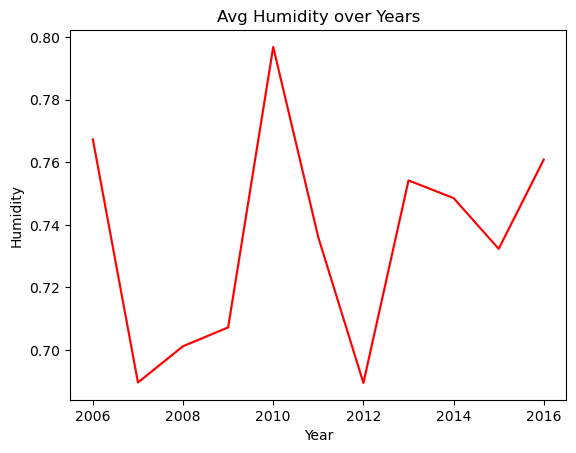

In [91]:
plt =sns.lineplot(x=X.index,y=X["Humidity"],color="red").set(title="Avg Humidity over Years")

In [92]:
df_humidity_over_months = pd.DataFrame(df.groupby("Month")["Humidity"].mean())

In [93]:
df_humidity_over_months.head()

,Humidity
Month,
1,0.850723
2,0.813400
3,0.702966
4,0.641133
5,0.691325


In [94]:
df_humidity_over_months.columns

Index(['Humidity'], dtype='object')

In [95]:
fig=px.line(df_humidity_over_months,x=["January","February","March","April","May","June","July","August","September","October","November","December"],y="Humidity")

In [96]:
fig.show()

In [97]:
df.columns

Index(['day', 'Month', 'Year', 'Time_Zone', 'Summary', 'Precip Type',
       'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [98]:
df = df.dropna()

In [99]:
df["Precip Type"].unique()

array(['rain', 'snow'], dtype=object)

In [100]:
df_Precip_type = pd.DataFrame(df.groupby("Year")["Precip Type"].describe(include=0).top)

In [101]:
df_Precip_type.rename(columns={"top":"Precip Type"})

,Precip Type
Year,
2006,rain
2007,rain
2008,rain
2009,rain
2010,rain
2011,rain
2012,rain
2013,rain
2014,rain


In [102]:
df_Precip_type.values

array([['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain'],
       ['rain']], dtype=object)

In [103]:
df_Summary = df.groupby(["Year","Month"],as_index=False)["Summary"].describe(include=0)

In [104]:
dict_month_map = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}

In [105]:
df_Summary.columns = ['Year', 'Month', 'count', 'unique', 'Summary', 'freq']
df_Summary.Month= df_Summary.Month.map(dict_month_map).astype(object)

In [106]:
fig = px.scatter(df_Summary,x="Year",y="Month",color="Summary")

In [107]:
fig.show()

<Axes: xlabel='Year', ylabel='Summary'>

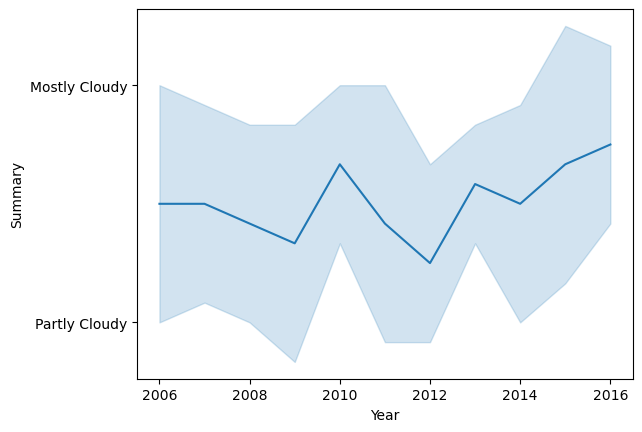

In [108]:
sns.lineplot(x=df_Summary["Year"],y=df_Summary["Summary"])

In [109]:
df.columns

Index(['day', 'Month', 'Year', 'Time_Zone', 'Summary', 'Precip Type',
       'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [110]:
df_avg_pressure = df.groupby("Month",as_index=False)["Pressure (millibars)"].mean()
dict_month_map = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
df_avg_pressure.Month = df_avg_pressure.Month.map(dict_month_map).astype(object)

In [111]:
fig = px.line(df_avg_pressure,x="Month",y="Pressure (millibars)",title="Avg Pressure Over Months",markers=True)

In [112]:
fig.show()

In [113]:
df_relate_avgpress_summary = df.groupby(["Summary"],as_index=False)["Pressure (millibars)"].mean()

In [114]:
df_relate_avgpress_summary.head()
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler()

In [116]:
data_for_scaler = df_relate_avgpress_summary["Pressure (millibars)"].values.reshape(-1,1)

In [117]:
df_relate_avgpress_summary["Normalized_p"] = scaler.fit_transform(data_for_scaler)

In [118]:
df_relate_avgpress_summary.head()

,Summary,Pressure (millibars),Normalized_p
0,Breezy,563.917593,0.488179
1,Breezy and Dry,1021.600000,1.000000
2,Breezy and Foggy,1008.934000,0.985836
3,Breezy and Mostly Cloudy,1000.622984,0.976542
4,Breezy and Overcast,1002.114924,0.978210


In [127]:
fig_2 = px.bar(df_relate_avgpress_summary,x="Summary",y="Pressure (millibars)",title="Relation between Summary and AvgPressure",text_auto=True,height=800)

In [128]:
fig_2.show()

In [129]:
df.columns

Index(['day', 'Month', 'Year', 'Time_Zone', 'Summary', 'Precip Type',
       'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Loud Cover', 'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [130]:
df_Avg_visibilty_Years = df.groupby(["Year"],as_index=False)["Visibility (km)"].mean()

In [137]:
figure = px.line(df_Avg_visibilty_Years,x="Year",y="Visibility (km)",markers=True)

In [138]:
figure.show()

In [139]:
df.dtypes

day                           int32
Month                         int32
Year                          int32
Time_Zone                    object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [140]:
df_Summary_avgWindSpeed = df.groupby(["Year","Summary"],as_index=False)["Wind Speed (km/h)"].mean()

In [142]:
df_Summary_avgWindSpeed.shape

(183, 3)

In [143]:
fig = px.scatter(df_Summary_avgWindSpeed,x="Year",y="Wind Speed (km/h)",color="Summary")

In [144]:
fig.show()

In [186]:
df_Top_Summary_per_Month  = df[df["Year"] == 2010].groupby("Month",as_index=False)["Summary"].describe(include=0)

In [187]:
df_Top_Summary_per_Month=df_Top_Summary_per_Month.rename(columns={"top":"Summary"})
df_Top_Summary_per_Month.Month = df_Top_Summary_per_Month["Month"].map(dict_month_map).astype(object)

In [188]:
df_Top_Summary_per_Month.head()
fig = px.scatter(df_Top_Summary_per_Month,x="Month",y="Summary")

In [189]:
fig.show()

In [228]:
from plotly.subplots import make_subplots
from math import ceil
fig = make_subplots(rows=4,cols=4,start_cell="top-left",)
for i,year in enumerate(range(2006,2017)):
    df_Summary_for_every_year = df[df["Year"] == int(year)].groupby("Month",as_index=False)["Summary"].describe(include=0)
    #print(df_Summary_for_every_year.head())
    #print(df_Summary_for_every_year.columns)
    df_Summary_for_every_year.Month = df_Summary_for_every_year["Month"].map(dict_month_map).astype(object)
    df_Summary_for_every_year = df_Summary_for_every_year.rename(columns={"top":"Summary"})
    row, col = divmod(i, 3)
    row += 1  # Adjust to 1-indexed rows
    
    fig.add_trace(go.Scatter(x=df_Summary_for_every_year["Month"], y=df_Summary_for_every_year["Summary"]),
                  row=row, col=col + 1)
fig.update_layout(height=1000,width=1500,title="Top Summary for Every Year")
fig.show()